In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = sns.load_dataset('tips')

### data explor

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
131,20.27,2.83,Female,No,Thur,Lunch,2
99,12.46,1.50,Male,No,Fri,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
141,34.30,6.70,Male,No,Thur,Lunch,6
107,25.21,4.29,Male,Yes,Sat,Dinner,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
125,29.80,4.20,Female,No,Thur,Lunch,6
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df.groupby(['day' , 'sex']).count()

total_bill  tip  smoker  time  size
day  sex                                        
Thur Male            30   30      30    30    30
     Female          32   32      32    32    32
Fri  Male            10   10      10    10    10
     Female           9    9       9     9     9
Sat  Male            59   59      59    59    59
     Female          28   28      28    28    28
Sun  Male            58   58      58    58    58
     Female          18   18      18    18    18

In [11]:
df.groupby(['smoker' , 'sex']).count()

total_bill  tip  day  time  size
smoker sex                                     
Yes    Male            60   60   60    60    60
       Female          33   33   33    33    33
No     Male            97   97   97    97    97
       Female          54   54   54    54    54

### mean precent of tip in each day 

In [12]:
df2 = df.groupby('day')[['tip' , 'total_bill']].sum()
df2['precent']= df2['tip']/df2['total_bill'] * 100
df2

,tip,total_bill,precent
day,,,
Thur,171.83,1096.33,15.673201
Fri,51.96,325.88,15.944519
Sat,260.40,1778.40,14.642375
Sun,247.39,1627.16,15.203791


### data visualisation 

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


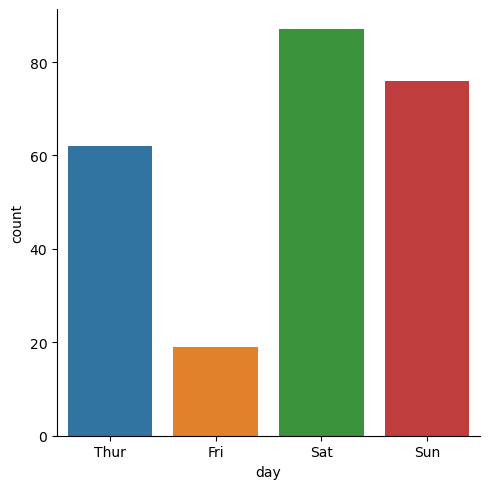

In [13]:
sns.catplot(data= df , x='day' , kind='count')

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


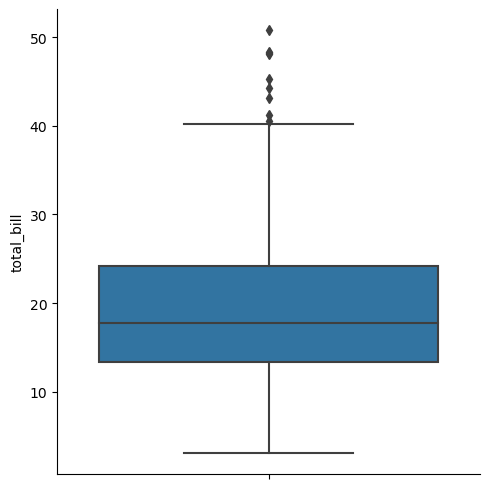

In [14]:
sns.catplot(data= df , y= 'total_bill' , kind='box')

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


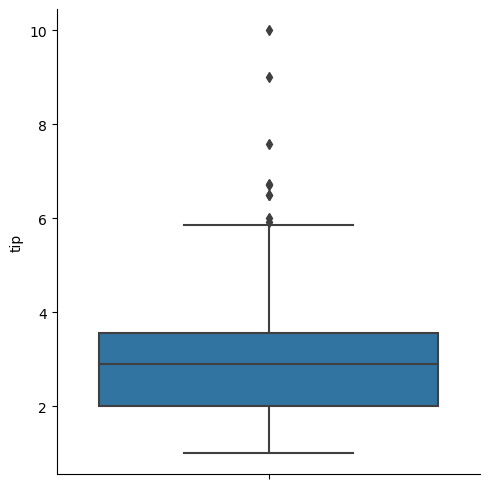

In [15]:
sns.catplot(data= df , y= 'tip' , kind='box')

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


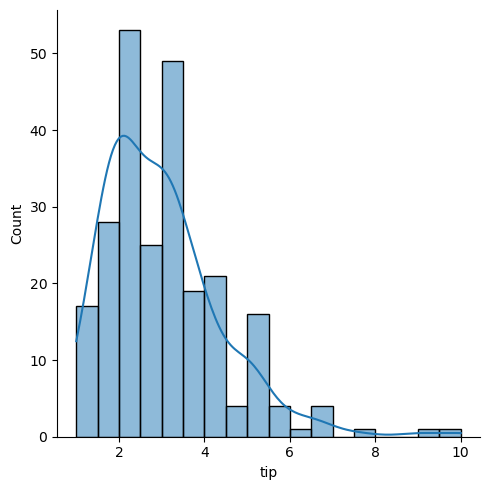

In [16]:
sns.displot(df['tip'], kde = True ) 

### preprocessing

In [17]:
df['sex'].unique()
df.replace({'sex':{'Male':1 , 'Female':0} , 'smoker' :{'Yes':'1' , 'No': 0}} , inplace= True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [18]:
days = pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
155,False,False,False,True
68,False,False,True,False
80,True,False,False,False
43,False,False,False,True
139,True,False,False,False


In [19]:
df= pd.concat([df , days] , axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,0,0,Sun,Dinner,2,False,False,False,True
1,10.34,1.66,1,0,Sun,Dinner,3,False,False,False,True
2,21.01,3.50,1,0,Sun,Dinner,3,False,False,False,True
3,23.68,3.31,1,0,Sun,Dinner,2,False,False,False,True
4,24.59,3.61,0,0,Sun,Dinner,4,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3,False,False,True,False
240,27.18,2.00,0,1,Sat,Dinner,2,False,False,True,False
241,22.67,2.00,1,1,Sat,Dinner,2,False,False,True,False
242,17.82,1.75,1,0,Sat,Dinner,2,False,False,True,False


In [20]:
times = pd.get_dummies(df['time'])
df = pd.concat([df , times] , axis= 1)
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,0,0,Sun,Dinner,2,False,False,False,True,False,True
1,10.34,1.66,1,0,Sun,Dinner,3,False,False,False,True,False,True
2,21.01,3.50,1,0,Sun,Dinner,3,False,False,False,True,False,True
3,23.68,3.31,1,0,Sun,Dinner,2,False,False,False,True,False,True
4,24.59,3.61,0,0,Sun,Dinner,4,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3,False,False,True,False,False,True
240,27.18,2.00,0,1,Sat,Dinner,2,False,False,True,False,False,True
241,22.67,2.00,1,1,Sat,Dinner,2,False,False,True,False,False,True
242,17.82,1.75,1,0,Sat,Dinner,2,False,False,True,False,False,True


### creating model for prediction for tip base on customer behaivor

In [32]:
x =  df[['sex' , 'smoker' , 'size' , 'Fri' , 'Sat' , 'Sun' , 'Dinner']]
y = df['tip']
y
x

,sex,smoker,size,Fri,Sat,Sun,Dinner
0,0,0,2,False,False,True,True
1,1,0,3,False,False,True,True
2,1,0,3,False,False,True,True
3,1,0,2,False,False,True,True
4,0,0,4,False,False,True,True
...,...,...,...,...,...,...,...
239,1,0,3,False,True,False,True
240,0,1,2,False,True,False,True
241,1,1,2,False,True,False,True
242,1,0,2,False,True,False,True


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [65]:
x_test ,x_train , y_test , y_train = train_test_split(x , y , test_size= 0.25 , random_state=26) 

In [66]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [67]:
prediction =regressor.predict(x_test)

In [68]:
x_test 


,sex,smoker,size,Fri,Sat,Sun,Dinner
2,1,0,3,False,False,True,True
14,0,0,2,False,False,True,True
45,1,0,2,False,False,True,True
131,0,0,2,False,False,False,False
198,0,1,2,False,False,False,False
...,...,...,...,...,...,...,...
193,1,1,2,False,False,False,False
176,1,1,2,False,False,True,True
6,1,0,2,False,False,True,True
62,1,1,2,False,True,False,True


In [69]:
y_test

2      3.50
14     3.02
45     3.00
131    2.83
198    2.00
       ... 
193    2.02
176    2.00
6      2.00
62     1.98
53     1.56
Name: tip, Length: 183, dtype: float64

In [70]:
prediction

array([3.24266057, 2.20610159, 2.56260108, 2.16353451, 2.25165662,
       2.84359399, 2.16992282, 4.24628005, 2.25804493, 1.90154544,
       2.16992282, 2.84998231, 3.24266057, 1.90154544, 2.84998231,
       2.16992282, 2.2942237 , 2.52003401, 3.52365348, 3.92272006,
       1.81342333, 2.56260108, 2.16992282, 2.52003401, 2.16992282,
       2.25165662, 2.65072319, 2.16353451, 2.56260108, 2.25804493,
       2.25804493, 2.56260108, 1.90154544, 1.81342333, 2.56260108,
       3.96827509, 2.63546762, 2.56260108, 2.16992282, 2.04353025,
       2.88616107, 1.81342333, 1.90154544, 2.65072319, 3.92272006,
       2.65072319, 2.52003401, 2.16353451, 2.40002974, 3.56622056,
       2.25804493, 1.81342333, 2.49900083, 2.25804493, 2.04353025,
       2.56260108, 2.25804493, 2.76737822, 2.25804493, 3.24266057,
       2.56260108, 2.65072319, 2.85550033, 2.25804493, 2.60815612,
       2.25804493, 2.52003401, 2.16353451, 2.84998231, 1.90154544,
       3.61177559, 2.49348281, 2.56260108, 2.84998231, 2.52003

In [71]:
#  metrics

print('mean absolute error :' , metrics.mean_absolute_error(y_test , prediction))
print('mean squared error :' , metrics.mean_squared_error(y_test , prediction))
print('root mean absolute error :' , np.sqrt(metrics.mean_absolute_error(y_test , prediction)))



mean absolute error : 0.9955963656101083
mean squared error : 1.908449982443387
root mean absolute error : 0.9977957534536356


In [76]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [77]:
# new data

new_customer = np.array([0 , 1 , 2 , 0,0,1, 1]).reshape(1 , -1)
regressor.predict(new_customer)

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.2942237])